# Twitter Data EDA

## Import Modules

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse

## Load Data

In [130]:
# States Current Values
states = pd.read_csv("../Data/Twitter/states.csv")
# States Historical Data
states_daily = pd.read_csv("../Data/Twitter/states-daily.csv")
# States Information
states_info = pd.read_csv("../Data/Twitter/states-info.csv")
# CDC Reported Tests
cdc_daily = pd.read_csv("../Data/Twitter/cdc-daily.csv")

## Dataset Summaries

### Overview

Four datasets from *The Covid Tracking Project* are examined in this exploratory analysis report. The four datasets include: *states*, *states_daily*, *states_info*, and *cdc_daily*. 

*states* shows the current spread of COVID-19 in each state. This dataset contains 56 rows, one for each US state/territory, and 29 attributes for each state/territory. The particular dataset we are exploring was from April 11, 2020.

*states_daily* contains historical information of the development of the spread of COVID-19 in the US by state. Our dataset contains 2056 rows and 25 columns. Each row is a unique day-state combination. The earliest entry recorded was from Feb.28 2020 from Washington state. 

*states_info* is a static dataset providing links to information regarding the most up-to-date information for that particular state. It provides us with data to perform NLP analysis in the future if time permits.

*cdc_daily* provides an overview of daily development of COVID-19 from CDC labs in the US. It has 82 rows and 5 columns. Each row denotes a single date dating from Jan.18, 2020.

In [61]:
print("Dimensions of states dataset: %s" % str(states.shape))
print("Dimensions of states_daily dataset: %s" % str(states_daily.shape))
print("Dimensions of states_info dataset: %s" % str(states_info.shape))
print("Dimensions of cdc_daily dataset: %s" % str(cdc_daily.shape))

Dimensions of states dataset: (56, 29)
Dimensions of states_daily dataset: (2056, 25)
Dimensions of states_info dataset: (56, 10)
Dimensions of cdc_daily dataset: (82, 5)


### Snapshot

In [62]:
states.head()

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,negative,pending,...,death,hospitalized,total,totalTestResults,posNeg,fips,dateModified,dateChecked,notes,hash
0,AK,257,1.0,1.0,1.0,1.0,A,4.0,7475,NaN,...,8.0,31.0,7732,7732,7732,2,2020-04-11T18:45:00Z,2020-04-11T20:39:00Z,"Please stop using the ""total"" field. Use ""tota...",9a40c45c0a168b48c7e6db4484946abc1dee37bb
1,AL,3262,1.0,1.0,0.0,1.0,B,3.0,18058,NaN,...,93.0,402.0,21320,21320,21320,1,2020-04-11T04:00:00Z,2020-04-12T02:51:00Z,"Please stop using the ""total"" field. Use ""tota...",89141ccadad5aa376d34b633a4a8ec97c66a668b
2,AR,1226,1.0,1.0,1.0,1.0,A,4.0,17352,NaN,...,24.0,130.0,18578,18578,18578,5,2020-04-11T17:20:00Z,2020-04-11T18:38:00Z,"Please stop using the ""total"" field. Use ""tota...",ca8cb0bd47947c73ac07b843155d113ef0bea032
3,AZ,3393,1.0,1.0,0.0,1.0,B,3.0,37137,NaN,...,108.0,NaN,40530,40530,40530,4,2020-04-11T04:00:00Z,2020-04-12T02:52:00Z,"Please stop using the ""total"" field. Use ""tota...",87f13b79fbc8dc86bb701d2b879e38c37371ec55
4,CA,20615,1.0,1.0,0.0,1.0,B,3.0,162371,13200.0,...,609.0,NaN,196186,182986,182986,6,2020-04-10T04:00:00Z,2020-04-12T03:23:00Z,"Please stop using the ""total"" field. Use ""tota...",75c29fc5f48a8f455022e2ae3f6119e0d3f2961a


In [63]:
states_daily.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200411,AK,257.0,7475.0,NaN,NaN,31.0,NaN,NaN,NaN,...,31.0,7732.0,7732.0,7732.0,2,1.0,3.0,289.0,11.0,300.0
1,20200411,AL,3191.0,18058.0,NaN,NaN,402.0,NaN,NaN,NaN,...,402.0,21249.0,21249.0,21249.0,1,11.0,34.0,0.0,223.0,223.0
2,20200411,AR,1226.0,17352.0,NaN,86.0,130.0,NaN,43.0,33.0,...,130.0,18578.0,18578.0,18578.0,5,1.0,0.0,1403.0,55.0,1458.0
3,20200411,AS,0.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200411,AZ,3393.0,37137.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40530.0,40530.0,40530.0,4,11.0,0.0,2515.0,281.0,2796.0


In [64]:
states_info.head()

,state,covid19SiteOld,covid19Site,covid19SiteSecondary,twitter,pui,pum,notes,fips,name
0,AK,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,@Alaska_DHSS,All data,False,Total tests are taken from the annotations on ...,2,Alaska
1,AL,http://www.alabamapublichealth.gov/infectiousd...,https://alpublichealth.maps.arcgis.com/apps/op...,NaN,@alpublichealth,No data,False,Negatives = (Totals - Positives) \nPositives o...,1,Alabama
2,AR,https://www.healthy.arkansas.gov/programs-serv...,https://www.healthy.arkansas.gov/programs-serv...,https://adem.maps.arcgis.com/apps/opsdashboard...,@adhpio,All data,True,Data is displayed across two web pages. timest...,5,Arkansas
3,AS,http://www.samoagovt.ws/2020/03/ministry-of-he...,https://www.americansamoa.gov/covid-19-advisories,https://www.facebook.com/amsamgov/,NaN,No Data,False,American Samoa has no testing facilities and m...,60,American Samoa
4,AZ,https://www.azdhs.gov/preparedness/epidemiolog...,https://www.azdhs.gov/preparedness/epidemiolog...,NaN,@azdhs,All data,False,Dashboard now has a new tab that details total...,4,Arizona


In [106]:
cdc_daily.tail()

,dateCollected,cdcLabs,usPubHealthLabs,dailyTotal,lag,DATE
77,4/4,12,6045,6057,1,
78,4/5,10,5659,5669,1,
79,4/6,11,6095,6106,1,
80,4/7,1,468,469,1,
81,4/8,0,0,0,1,


## Data Visualization

### United States

Text(0.5, 1.0, 'Number of New Cases in the US per Day According to CDC')

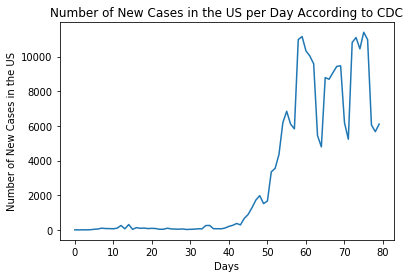

In [122]:
plt.plot(cdc_daily["dailyTotal"][:80])
plt.xlabel("Days")
plt.ylabel("Number of New Cases in the US")
plt.title("Number of New Cases in the US per Day According to CDC")

### New York State

Text(0.5, 1.0, 'Number of Positive Cases vs Number of Negative Cases in State of NY')

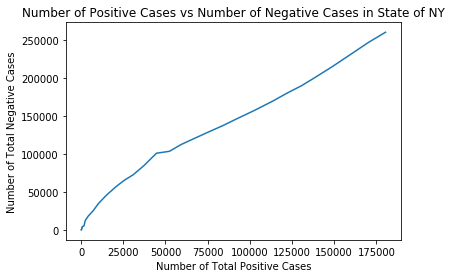

In [121]:
# Single out data from NY
NY_state = states_daily[states_daily["state"] == "NY"]
# Plot 1: Positive vs Negative
plt.plot(NY_state["positive"], NY_state["negative"])
plt.xlabel("Number of Total Positive Cases")
plt.ylabel("Number of Total Negative Cases")
plt.title("Number of Positive Cases vs Number of Negative Cases in State of NY")

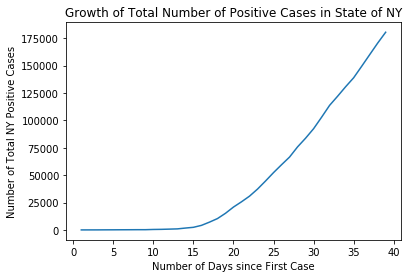

In [195]:
# Plot 2: Positive vs Negative
NY_state["days"] = range(39, 0, -1)
plt.plot(NY_state["days"], NY_state["positive"])
plt.xlabel("Number of Days since First Case")
plt.ylabel("Number of Total NY Positive Cases")
plt.title("Growth of Total Number of Positive Cases in State of NY")
NY_state_day = NY_state["date"]%100
NY_state_month = NY_state["date"]//100%100
NY_state_year = NY_state["date"]//10000


## Correlation Matrix for New York

In [197]:
# Correlation Matrix
NY_state.corr()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,days
date,1.000000,0.945350,0.925240,0.894427,0.924094,0.933527,0.918407,NaN,NaN,NaN,...,0.935653,0.935656,0.935656,NaN,0.958986,0.501845,0.699800,0.840331,0.785533,0.876862
positive,0.945350,1.000000,0.990389,0.780471,0.967761,0.986252,0.973592,NaN,NaN,NaN,...,0.996652,0.996645,0.996645,NaN,0.989893,0.460085,0.758578,0.898576,0.846033,0.918529
negative,0.925240,0.990389,1.000000,0.834622,0.948090,0.977759,0.955570,NaN,NaN,NaN,...,0.998381,0.998386,0.998386,NaN,0.968562,0.526834,0.816068,0.943759,0.899973,0.953788
pending,0.894427,0.780471,0.834622,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.988350,0.851021,0.851021,NaN,NaN,NaN,-0.821995,0.368928,-0.544705,0.894427
hospitalizedCurrently,0.924094,0.967761,0.948090,NaN,1.000000,0.994980,0.998041,NaN,NaN,NaN,...,0.957763,0.957763,0.957763,NaN,0.987800,-0.508202,0.421796,0.790155,0.595865,0.977352
hospitalizedCumulative,0.933527,0.986252,0.977759,NaN,0.994980,1.000000,0.996200,NaN,NaN,NaN,...,0.982273,0.982273,0.982273,NaN,0.991681,-0.022699,0.442174,0.877961,0.723330,0.988806
inIcuCurrently,0.918407,0.973592,0.955570,NaN,0.998041,0.996200,1.000000,NaN,NaN,NaN,...,0.964493,0.964493,0.964493,NaN,0.986261,-0.522860,0.435912,0.776898,0.602803,0.981191
inIcuCumulative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onVentilatorCurrently,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onVentilatorCumulative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
